In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


In [2]:
# Creating the companies dataframe
companies = pd.read_csv("/home/suyash/ML course/Investment analys assignment/companies.csv",encoding = 'unicode_escape')
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [3]:
#Analysing the data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
# Removing the special characters in Permalink and name column.
companies['permalink']=companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

In [6]:
# Creating rounds2 dataframe
rounds2 = pd.read_csv("/home/suyash/ML course/Investment analys assignment/rounds2.csv",encoding = 'unicode_escape')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
#Analysing the data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [8]:
# Removing the special characters in company_permalink and funding_round_permalink column
rounds2['company_permalink']=rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
rounds2['funding_round_permalink']=rounds2[['funding_round_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

In [9]:
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [10]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [11]:
# Converting the columns ( company_permalink in round2 and permalink & name in companies) to lowercase to avoid duplicacy due to different case
companies.permalink = companies.permalink.apply(lambda x: x.lower())
companies['name']=companies['name'].str.lower()

In [12]:
len(rounds2.company_permalink.unique())

66368

In [13]:
## Cleaning the name column, assigning the name of the company to the NaN cell, as there is only one and we can get the name from its permalink.

companies.loc[companies['permalink']=='/organization/tell-it-in',['name']]=' '.join(companies[companies['permalink']=='/organization/tell-it-in']['permalink'].str.split('/').tolist()[0][2].split('-'))

In [14]:
len(companies.name.unique())


66035

In [15]:
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [16]:
master_frame = pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how='left')


In [17]:
master_frame.shape

(114949, 16)

In [18]:
## Creating a backup dataframe to calculate the percent of data removed from the dataframe

master_frame_bkp=master_frame.copy()

In [19]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [21]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           0
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [22]:
# We are removing those entries where status is closed as there is no investment going to happen for these companies.
master_frame = master_frame[master_frame['status']!='closed']

In [23]:
master_frame[master_frame['raised_amount_usd'].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN,/organization/1,one inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,/organization/1-4-all,1-4 all,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN,/organization/1-618-technology,1.618 technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114899,/organization/zymr-inc-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN,/organization/zymr-inc-,"zymr, inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN
114905,/organization/zynergy-projects-services,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN,/organization/zynergy-projects-services,zynergy projects & services,http://www.zynergygroup.net/,Clean Technology,operating,IND,25,Chennai,Chennai,NaN
114913,/organization/zynga,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN,/organization/zynga,zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007
114927,/organization/zypsee,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN,/organization/zypsee,whisk (formerly zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01-01-2011


In [24]:
master_frame.shape

(106224, 16)

In [26]:
master_frame[master_frame.status == 'closed']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [27]:
# Removing all the rows where 'raised_amount_usd' is null. This will impact the average and other calculations.

master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [28]:
master_frame.shape

(87903, 16)

In [29]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.21
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.31
category_list               0.72
status                      0.00
country_code                5.26
state_code                  7.10
region                      6.50
city                        6.50
founded_at                 15.82
dtype: float64

In [30]:
len(master_frame.name.unique())

48812

In [31]:
# Converting the amounts of 'raised_amount_usd' column from $ to million $ for easier calculation and understandability.
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda val: round(val/1000000,3))

In [32]:
master_frame=master_frame.rename(columns = {'raised_amount_usd':'raised_amount_mil_usd'})

In [33]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.041,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,0.033,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,0.041,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,0.033,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,0.018,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [34]:
master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean()

funding_round_type
angel                      0.979917
convertible_note           1.479851
debt_financing            17.774072
equity_crowdfunding        0.519852
grant                      4.154310
non_equity_assistance      0.402853
post_ipo_debt            174.609345
post_ipo_equity           84.233854
private_equity            75.575805
product_crowdfunding       1.411511
secondary_market          91.439808
seed                       0.738591
undisclosed               18.837079
venture                   11.895604
Name: raised_amount_mil_usd, dtype: float64

In [35]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.041,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,0.033,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,0.041,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,0.033,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,0.018,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [36]:
master_frame[master_frame['country_code'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43.924,/organization/1000chi,beijing 1000chi software technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008
66,/organization/10k-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,NaN,04-09-2015,0.100,/organization/10k-2,beans around,http://beansaround.com/,Coffee|Delivery|Subscription Service,operating,NaN,NaN,NaN,NaN,01-04-2015
95,/organization/1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,0.150,/organization/1234enter,1234enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,NaN,01-09-2012,0.500,/organization/1234enter,1234enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114697,/organization/zoweetv,/funding-round/af5f5650fabb087d02a62ffcfbe185a8,seed,NaN,01-01-2012,0.900,/organization/zoweetv,zoweetv,http://www.zoweetv.com,Games,operating,NaN,NaN,NaN,NaN,NaN
114736,/organization/zte9-corporation,/funding-round/e9e5a96d230dababfd3f9d2c63c702a5,venture,A,01-02-2014,2.059,/organization/zte9-corporation,zte9 corporation,http://zte9.com/,Mobile,operating,NaN,NaN,NaN,NaN,NaN
114752,/organization/zuggi,/funding-round/e8fa50bcf4086dc88c07a901258b8b4f,seed,NaN,20-06-2011,0.040,/organization/zuggi,zuggi,http://www.zuggi.com.br/home.php,Search,operating,NaN,NaN,NaN,NaN,01-11-2010
114849,"/organization/zwayo-""on-demand-valet-parking""",/funding-round/eb5163bb6feea4384121e27699bb7b25,seed,NaN,01-09-2014,0.060,"/organization/zwayo-""on-demand-valet-parking""","zwayo ""on-demand valet parking""",http://www.zwayo.co,Apps|Cars|Parking,operating,NaN,NaN,NaN,NaN,01-09-2014


In [37]:
master_frame.category_list.isna().count()

87903

In [38]:
master_frame.shape

(87903, 16)

In [39]:
# Removing null value rows for the country code column. The analysis will also be based in countries.
master_frame = master_frame[pd.notnull(master_frame['country_code'])]

In [40]:
master_frame.shape

(83277, 16)

In [41]:
len(master_frame.name.unique())

45288

In [48]:
master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].sum()

funding_round_type
angel                      3961.117
convertible_note           1708.516
debt_financing           109600.327
equity_crowdfunding         575.685
grant                      7980.859
non_equity_assistance        27.176
post_ipo_debt             24214.824
post_ipo_equity           36700.202
private_equity           131204.946
product_crowdfunding        488.256
secondary_market           2352.235
seed                      15142.895
undisclosed               20695.528
venture                  535034.812
Name: raised_amount_mil_usd, dtype: float64

In [49]:
master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean().between(5.0,15.0,inclusive=True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_mil_usd, dtype: bool

In [50]:
master_frame_vent = master_frame[master_frame.funding_round_type == 'venture']

In [51]:
master_frame_vent.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         19874
funded_at                      0
raised_amount_mil_usd          0
permalink                      0
name                           0
homepage_url                1983
category_list                201
status                         0
country_code                   0
state_code                   696
region                       549
city                         549
founded_at                  7506
dtype: int64

In [52]:
#creating a data frame named top9 with the top nine countries 

top9 = master_frame_vent.groupby('country_code',as_index=False)['raised_amount_mil_usd'].sum().sort_values(by = ['raised_amount_mil_usd'],ascending=False).head(9)
top9['Rank'] = range(1,10)
top9.set_index(['Rank'],inplace = True)

In [53]:
master_frame_vent

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,0.555,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,0.141,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8.500,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2.687,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007


In [54]:
top9

,country_code,raised_amount_mil_usd
Rank,,
1,USA,399935.179
2,CHN,39101.773
3,GBR,18241.345
4,IND,14050.604
5,CAN,8825.477
6,FRA,6775.039
7,ISR,6503.020
8,DEU,6061.141
9,JPN,3242.031


In [55]:
len(top9.country_code.unique())

9

In [56]:
master_frame.shape

(83277, 16)

In [57]:
mapping = pd.read_csv("/home/suyash/ML course/Investment analys assignment/mapping.csv",encoding = 'unicode_escape')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [58]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [59]:
# Creating containing the first category as it the primary category.
prim_sector = master_frame_vent['category_list'].str.split('|',n=1,expand=True)

In [60]:
master_frame_vent.shape

(44949, 16)

In [61]:
prim_sector.shape

(44949, 2)

In [62]:
type(prim_sector)

pandas.core.frame.DataFrame

In [63]:
# Filling the 'Primary_Sector' column with the extrated category values.
master_frame_vent['Primary_Sector']=prim_sector[0]

In [64]:
# Analysied the mappings data frame. Found the Replacing 0 in the category list entries where it shuls
mapping['category_list']=mapping['category_list'].str.replace('0','na')

In [65]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [66]:
# Using melt function from Pandas library. Using 'category_list' as the column in front of which we will need to get the columns containing 1.
# This actually prints all the column names containing 1s and 0s also

melted=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [67]:
melted.head(30)


,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [68]:
# We need only those column entries which have 1 in the respective cells.
melted=melted[melted.value==1]

In [69]:
# Changing column names
melted=melted.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [70]:
# Dropping the value column as it is not necessary.
melted=melted.drop('value',axis=1)

In [71]:
master_FT = pd.merge(master_frame_vent,melted,on='Primary_Sector',how='inner')

In [72]:
master_FT.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Blanks                                       201
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [73]:
master_FT=master_FT[master_FT.main_sector!='Blanks']

In [74]:
master_FT.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [75]:
master_FT.shape

(44572, 18)

In [76]:
master_frame_vent.shape

(44949, 17)

In [77]:
master_FT_5M_15M = master_FT[master_FT['raised_amount_mil_usd'].between(5.0,15.0,inclusive=True)]

In [121]:
master_FT_5M_15M.shape

(14756, 18)

In [ ]:
# Creating D1, D2 and D3 Datarames as per the mentioned requirements in Probelm Description.

In [79]:
D1 = master_FT_5M_15M[master_FT_5M_15M['country_code']=='USA']
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))

In [80]:
D2 = master_FT_5M_15M[master_FT_5M_15M['country_code']=='GBR']
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))

In [81]:
D3 = master_FT_5M_15M[master_FT_5M_15M['country_code']=='IND']
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))


In [82]:
master_FT_5M_15M[master_FT_5M_15M['main_sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector


In [83]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,531,4602.749
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.00,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,531,4602.749
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
30,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5.00,/organization/mediabong,mediabong,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,531,4602.749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44750,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,A,18-09-2013,5.00,/organization/thredhq,thredhq,https://thredhq.com/,Social + Mobile + Local|Social Network Media,operating,USA,CA,SF Bay Area,Berkeley,01-01-2012,Social + Mobile + Local,"Social, Finance, Analytics, Advertising",2594,22860.775
44755,/organization/wizrocket-technologies,/funding-round/195738852853780cc8f1220ba6fb761d,venture,A,03-08-2015,8.00,/organization/wizrocket-technologies,clevertap,https://clevertap.com/,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,CA,SF Bay Area,Palo Alto,24-05-2013,Consumer Behavior,"Social, Finance, Analytics, Advertising",2594,22860.775
44760,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,8.25,/organization/user-interface,user interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaN,User Interface,Others,2765,24691.700
44762,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,10.50,/organization/washio,washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Service Industries,Others,2765,24691.700


In [84]:
#Country 1
D1.shape[0]

11269

In [85]:
#Country 2
D2.shape[0]

582

In [86]:
#Country 3
D3.shape[0]

315

In [87]:
#Country 1
D1.raised_amount_mil_usd.sum()

100851.886

In [88]:
#Country 2
D2.raised_amount_mil_usd.sum()

5061.262000000001

In [89]:
#Country 3
D3.raised_amount_mil_usd.sum()

2820.674

In [90]:
top_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D1

'Others'

In [91]:
D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     2765
Social, Finance, Analytics, Advertising    2594
Cleantech / Semiconductors                 2152
Name: main_sector, dtype: int64

In [92]:
# Country 2
top_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D2

'Others'

In [93]:
top_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D3

'Others'

In [94]:
#Country 1
sec_best_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D1

'Social, Finance, Analytics, Advertising'

In [95]:
# Country 2
sec_best_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D2

'Social, Finance, Analytics, Advertising'

In [96]:

# Country 3
sec_best_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D3

'Social, Finance, Analytics, Advertising'

In [97]:
#Country 1
third_best_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D1

'Cleantech / Semiconductors'

In [98]:
# Country 2
third_best_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D2

'Cleantech / Semiconductors'

In [100]:
# Country 3
third_best_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D3

'News, Search and Messaging'

In [101]:
# Country 1
D1[D1.main_sector == top_sector_D1].shape[0]

2765

In [102]:
# Country 2
D2[D2.main_sector == top_sector_D2].shape[0]


141

In [103]:
# Country 3
D3[D3.main_sector == top_sector_D3].shape[0]

103

In [104]:

# Country 1
D1[D1.main_sector == sec_best_D1].shape[0]

2594

In [105]:

# Country 2
D2[D2.main_sector == sec_best_D2].shape[0]

128

In [106]:
# Country 3
D3[D3.main_sector == sec_best_D3].shape[0]

59

In [107]:
# Country 1
D1[D1.main_sector == third_best_D1].shape[0]

2152

In [108]:
# Country 2
D2[D2.main_sector == third_best_D2].shape[0]

115

In [109]:
# Country 3
D3[D3.main_sector == third_best_D3].shape[0]

49

In [110]:
D1[D1.main_sector == top_sector_D1].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'udacity'

In [111]:
# Country 2
D2[D2.main_sector == top_sector_D2].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'tribold'

In [112]:
D3[D3.main_sector == top_sector_D3].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]


'k-12 techno services'

In [113]:
D1[D1.main_sector == sec_best_D1].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]


'livefyre'

In [114]:
D2[D2.main_sector == sec_best_D2].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]


'similarweb'

In [115]:
D3[D3.main_sector == sec_best_D3].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]


'apnapaisa'

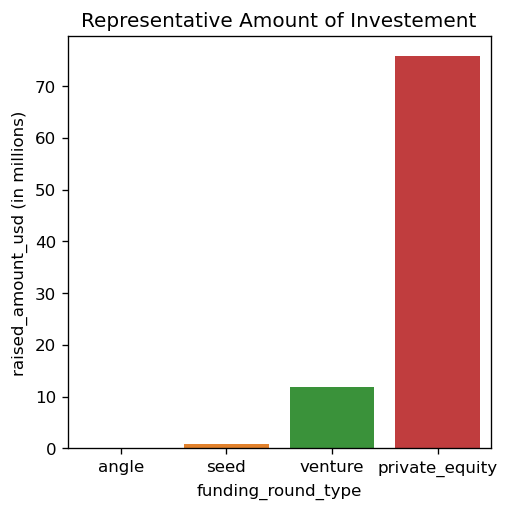

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10.0,10.0],dpi=120,edgecolor='c',frameon=True)

plt.subplot(222)
sns.barplot(x=master_frame['funding_round_type'],y=master_frame['raised_amount_mil_usd'],estimator=np.mean,order=["angle","seed","venture","private_equity"],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Representative Amount of Investement") 
plt.show()

In [127]:
top9

,country_code,raised_amount_mil_usd
Rank,,
1,USA,399935.179
2,CHN,39101.773
3,GBR,18241.345
4,IND,14050.604
5,CAN,8825.477
6,FRA,6775.039
7,ISR,6503.020
8,DEU,6061.141
9,JPN,3242.031


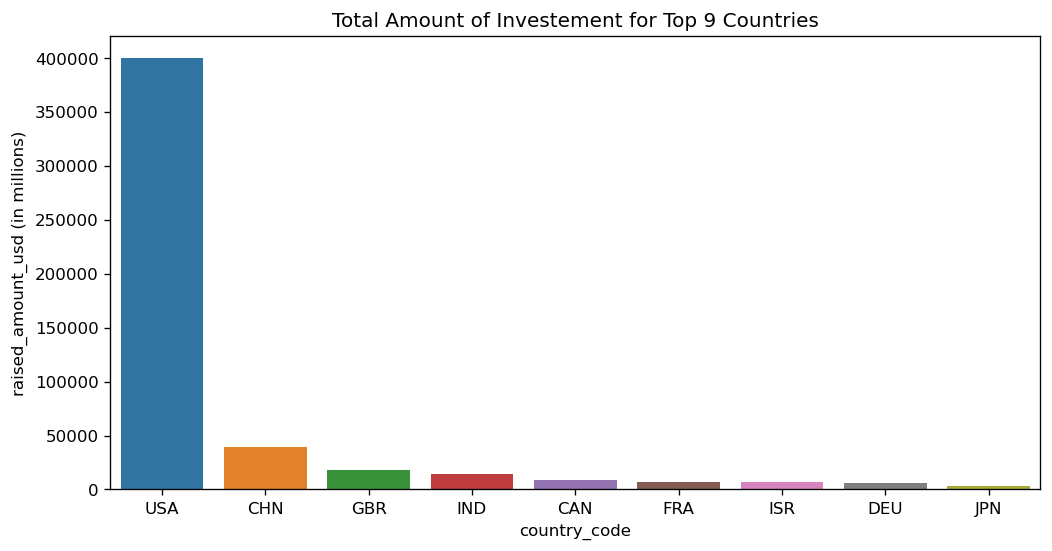

In [128]:
 
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x=top9['country_code'],y=top9['raised_amount_mil_usd'],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Total Amount of Investement for Top 9 Countries") 
plt.show()

NameError: name 'TIC' is not defined

<Figure size 1200x600 with 0 Axes>

In [130]:
TIC=pd.merge(pd.merge(D1,D2,how='outer'),D3,how='outer')
TIC.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,531,4602.749
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.0,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,531,4602.749
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.0,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.0,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
4,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5.0,/organization/mediabong,mediabong,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,531,4602.749


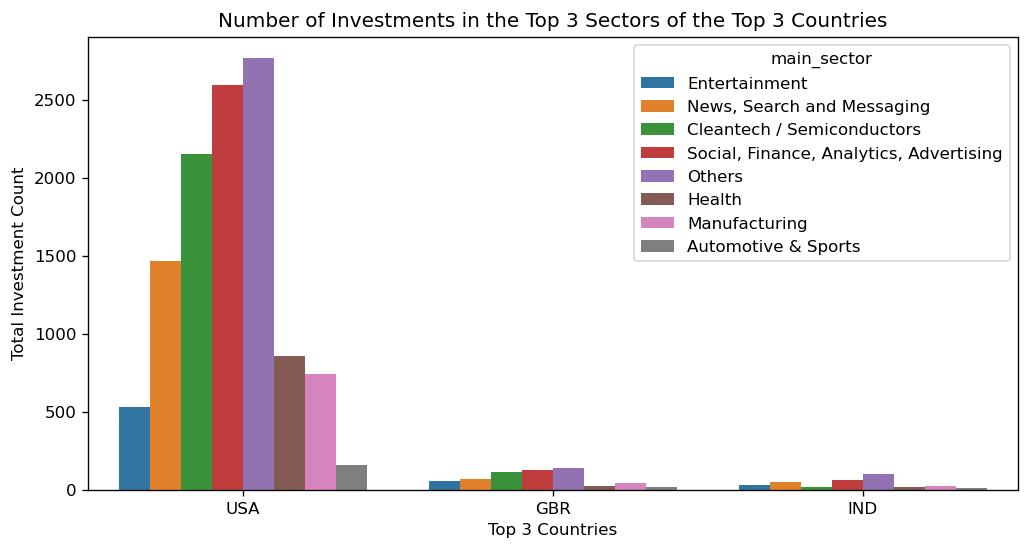

In [133]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x='country_code', y='count_of_invest', hue='main_sector',data=TIC)
plt.ylabel("Total Investment Count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries") 
plt.show()